In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_excel('Final_Train.csv')
dfd = pd.read_excel('Final_Test.csv')

In [3]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
dfd.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
df.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
dfd.isna().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

<AxesSubplot:>

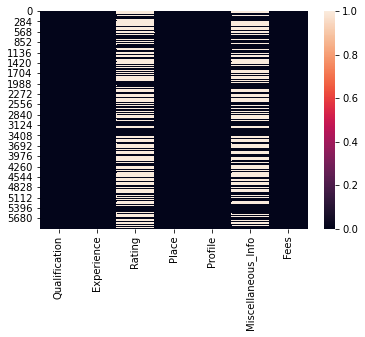

In [7]:
sns.heatmap(df.isna())

<AxesSubplot:>

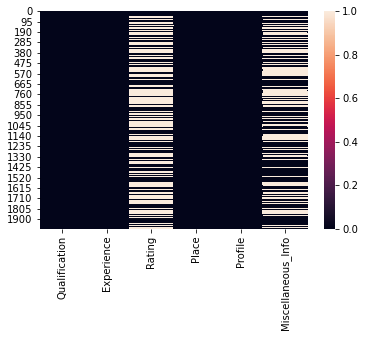

In [9]:
sns.heatmap(dfd.isna())

In [10]:
# Correltaion
df.corr()

,Fees
Fees,1.0


In [11]:
#datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [12]:
#description on the dataset
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [13]:
df.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


In [14]:
df.Qualification.value_counts()

BDS                                                                                                                   488
BHMS                                                                                                                  477
BAMS                                                                                                                  471
MBBS                                                                                                                  334
MBBS, MS - ENT                                                                                                        220
                                                                                                                     ... 
BHMS, BHMS, MS - Psychology                                                                                             1
DNB - Dermatology & Venereology, MBBS, DDVL                                                                             1
MBBS, Postgraduate Diplo

In [15]:
df1 = df.copy()

In [16]:
df1.Qualification = df.Qualification.apply(lambda x:x.split(",")[0])

In [17]:
df1.Qualification.value_counts()

MBBS                                                        2448
BDS                                                         1208
BAMS                                                         711
BHMS                                                         706
MD - Dermatology                                              84
                                                            ... 
MDS - Oral & Maxillofacial Pathology and Microbiology          1
Fellowship and Diplomate in Implantology from ICOI (USA)       1
PhD - Neuropsychology                                          1
FRGUHS                                                         1
MSc                                                            1
Name: Qualification, Length: 151, dtype: int64

In [18]:
main_qualications = ['MBBS', 'BDS', 'BAMS', 'BHMS']

In [19]:
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,BSc - Zoology,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,MBBS,19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,MBBS,15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [20]:
pd.DataFrame(df1.Qualification.value_counts()).Qualification[:60]

MBBS                                                     2448
BDS                                                      1208
BAMS                                                      711
BHMS                                                      706
MD - Dermatology                                           84
MS - ENT                                                   71
MD - Dermatology                                           62
MD - Homeopathy                                            56
MD - Ayurveda Medicine                                     38
DHMS (Diploma in Homeopathic Medicine and Surgery)         36
MDS - Oral & Maxillofacial Surgery                         26
MD - General Medicine                                      26
MDS - Conservative Dentistry & Endodontics                 25
MS - Otorhinolaryngology                                   25
Get inspired by remarkable stories of people like you      24
DDVL                                                       20
MD - Phy

In [21]:
main_qualications = ['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD', 'MDS', 'MS']

In [23]:
df1.Qualification = df1.Qualification.mask(~df1.Qualification.isin(main_qualications),'Other')

<AxesSubplot:xlabel='Qualification', ylabel='count'>

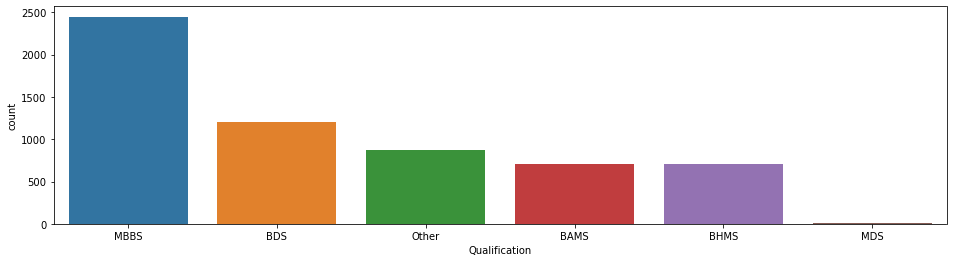

In [24]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))
fig_this_size(16,4)
sns.countplot(df1.Qualification,order=df1.Qualification.value_counts().index)


*Most of the Doctors have the MBBS qualification(Bachelor of Medicine and Bachelor of Surgery),So these the surgeons.

*The next are the doctors with the BDS degree(Bachelor of Dental Surgery), So these are the Dentists.

*The next are the doctors with the BAMS degree(Bachelor of Ayurvedic Medicine and Surgery),There are the aurvedic doctor.

In [25]:
df.Experience

0       24 years experience
1       12 years experience
2        9 years experience
3       12 years experience
4       20 years experience
               ...         
5956    19 years experience
5957    33 years experience
5958    41 years experience
5959    15 years experience
5960    17 years experience
Name: Experience, Length: 5961, dtype: object

In [29]:
df1.Experience = df.Experience.str.extract('(\d+)')
df1.rename(columns={'Experience':'Years_Of_Experience'},inplace=True)

In [30]:
df1.Years_Of_Experience.dtype

dtype('O')

In [31]:
#type conversion
df1.Years_Of_Experience = df1.Years_Of_Experience.astype('int')

In [32]:
df1.Years_Of_Experience.dtype

dtype('int32')

<AxesSubplot:xlabel='Years_Of_Experience', ylabel='Density'>

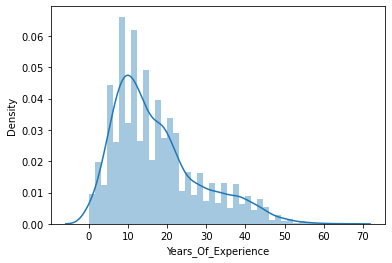

In [33]:
sns.distplot(df1.Years_Of_Experience)

<AxesSubplot:xlabel='Years_Of_Experience', ylabel='count'>

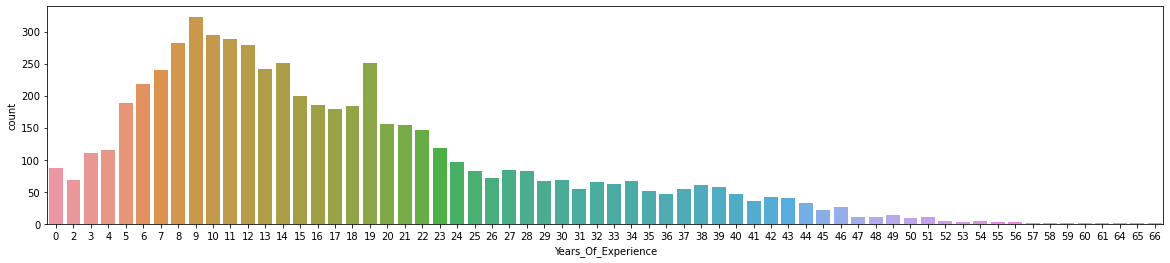

In [34]:
plt.figure(figsize=(20,4))
sns.countplot(df1.Years_Of_Experience)

In [35]:
df1.Years_Of_Experience.describe()

count    5961.000000
mean       17.303976
std        11.142798
min         0.000000
25%         9.000000
50%        14.000000
75%        23.000000
max        66.000000
Name: Years_Of_Experience, dtype: float64

In [36]:
df.Rating.value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
84%      13
79%      13
67%      12
81%      12
71%       9
76%       9
75%       8
73%       8
74%       7
60%       7
78%       6
56%       5
68%       5
70%       4
69%       4
57%       3
72%       3
63%       2
62%       2
33%       2
55%       2
64%       2
40%       1
45%       1
65%       1
7%        1
48%       1
58%       1
53%       1
47%       1
36%       1
Name: Rating, dtype: int64

In [37]:
df1.Rating = df.Rating.str.strip('%').astype('float')

In [38]:
df1.Rating.dtype

dtype('float64')

<AxesSubplot:xlabel='Rating', ylabel='count'>

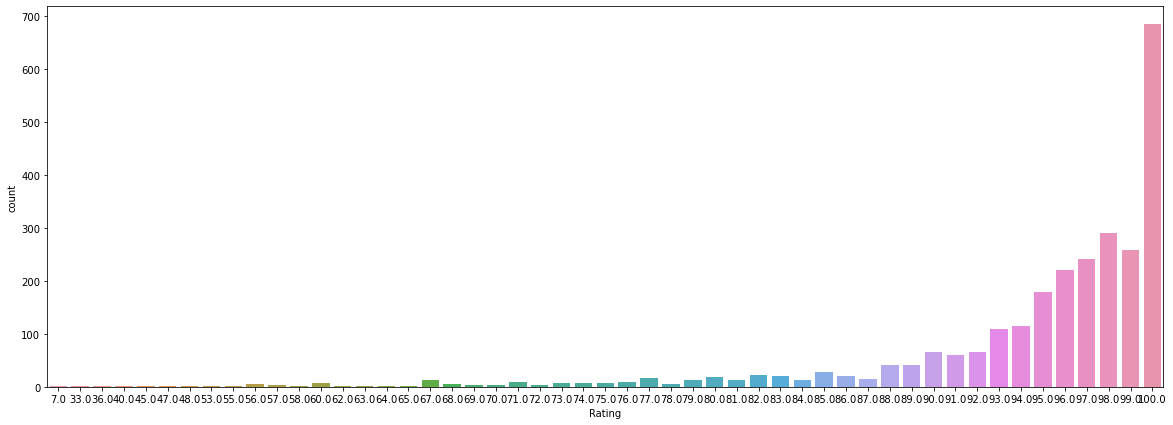

In [39]:
fig_this_size(20,7)
sns.countplot(df1.Rating)

*We see that in majority of cases doctor has 100% Values

In [40]:
df.Place.value_counts()

HSR Layout, Bangalore              75
Andheri West, Mumbai               70
Dwarka, Delhi                      67
Banjara Hills, Hyderabad           64
Mulund West, Mumbai                54
                                   ..
Kallambalam, Thiruvananthapuram     1
RMV 2nd Stage, Bangalore            1
Uppilipalayam, Coimbatore           1
Connaught Place, Delhi              1
Kalyanpuri, Hyderabad               1
Name: Place, Length: 877, dtype: int64

In [41]:
df.Place

0                 Kakkanad, Ernakulam
1               Whitefield, Bangalore
2          Mathikere - BEL, Bangalore
3        Bannerghatta Road, Bangalore
4               Keelkattalai, Chennai
                    ...              
5956          Basavanagudi, Bangalore
5957            Nungambakkam, Chennai
5958    Greater Kailash Part 2, Delhi
5959           Vileparle West, Mumbai
5960                 Pitampura, Delhi
Name: Place, Length: 5961, dtype: object

In [42]:
df.Place.isna().sum()

25

In [43]:
df.Profile.value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

<AxesSubplot:xlabel='Profile', ylabel='count'>

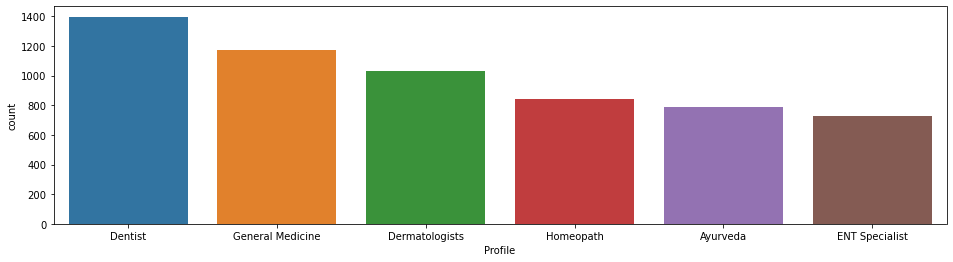

In [44]:
fig_this_size(16,4)
sns.countplot(df.Profile,order=df.Profile.value_counts().index)

In [45]:
df1.Miscellaneous_Info.value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      40
Dental Fillings Zirconia Crowns Dental Implant Fixing                                   12
Tooth Extraction Dental Fillings Scaling / Polishing                                    12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment     9
Skin Allergy Treatment Skin Allergies Dermabrasion                                       9
                                                                                        ..
Otoplasty Midface Lift Frenectomy                                                        1
7 Feedback Bandra West, Mumbai ₹250                                                      1
Artificial Teeth Scaling / Polishing Teeth Whitening                                     1
3 Feedback Saket, Delhi ₹1,200                                                           1
Dental Examinations Dental Crowns Dental Fillings                                        1

In [46]:
df1.drop('Miscellaneous_Info',1,inplace=True)
df1

,Qualification,Years_Of_Experience,Rating,Place,Profile,Fees
0,BHMS,24,100.0,"Kakkanad, Ernakulam",Homeopath,100
1,BAMS,12,98.0,"Whitefield, Bangalore",Ayurveda,350
2,MBBS,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,Other,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,MBBS,19,98.0,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41,97.0,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,MBBS,15,90.0,"Vileparle West, Mumbai",General Medicine,100


(array([ 132., 1564., 1216., 1010.,  490.,  961.,  237.,  187.,  144.,
          20.]),
 array([  5. ,  99.5, 194. , 288.5, 383. , 477.5, 572. , 666.5, 761. ,
        855.5, 950. ]),
 <BarContainer object of 10 artists>)

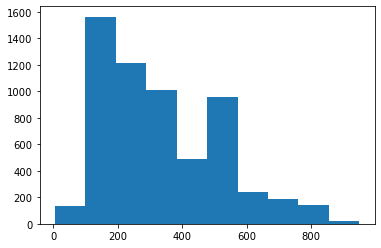

In [47]:
plt.hist(df.Fees)

In [48]:
df.Fees.describe()

count    5961.000000
mean      307.944640
std       190.920373
min         5.000000
25%       150.000000
50%       300.000000
75%       500.000000
max       950.000000
Name: Fees, dtype: float64

<AxesSubplot:xlabel='Fees'>

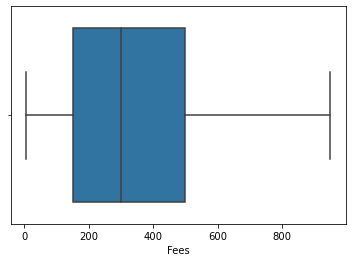

In [49]:
sns.boxplot(df.Fees)

MBBS
BDS
Other
BAMS
BHMS
MDS


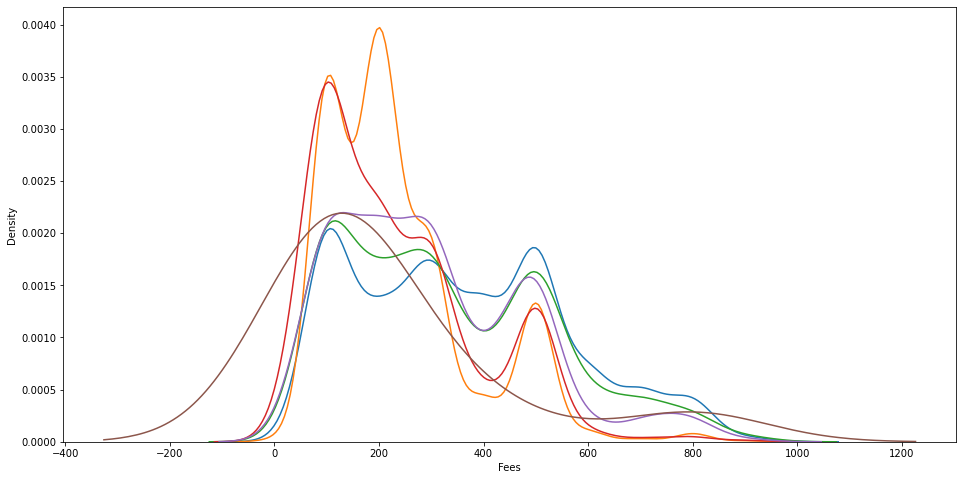

In [50]:
#Fees with respect to qualification of the doctor
fig_this_size(16,8)
for Q in df1.Qualification.value_counts().index:
    print(Q)
    sns.kdeplot(df1[df1.Qualification == Q]['Fees'],label=Q)

The doctors with BDS & MDS qualification charge high fees. We can see that the fees or a dentitst is much higher that that of an MBBS.

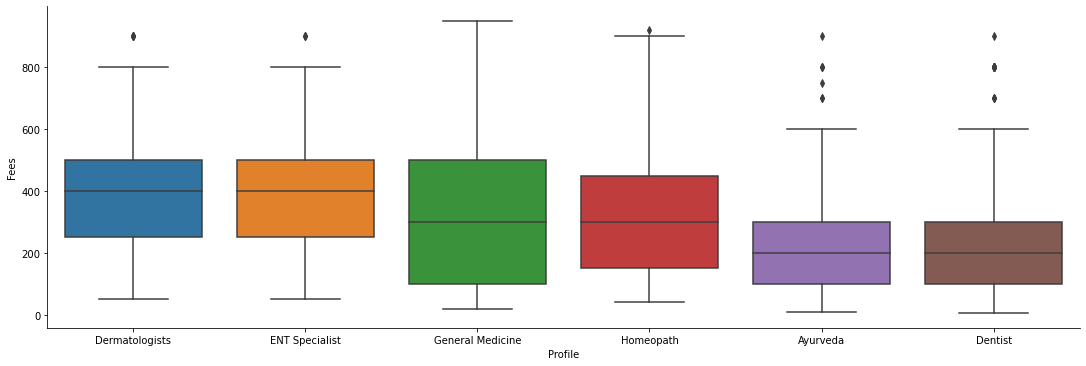

In [51]:
sns.catplot(x='Profile',y='Fees',data=df1,kind='box',aspect=3,order=df1.groupby('Profile')['Fees'].mean().sort_values(ascending=False).index)

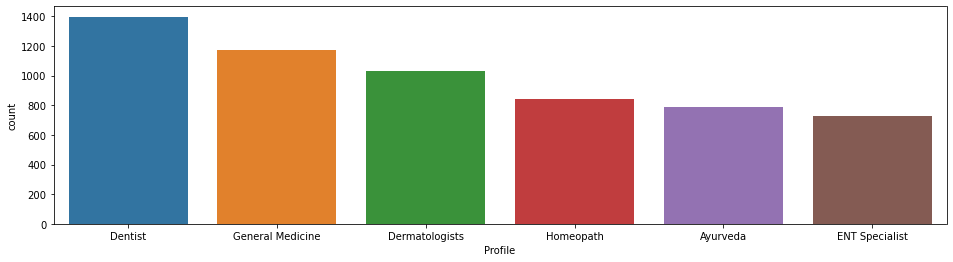

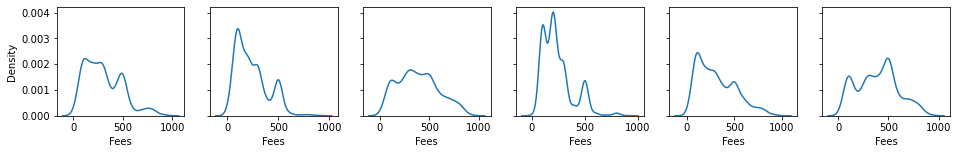

In [52]:
fig_this_size(16,4)
sns.countplot(x=df['Profile'],order=df1.Profile.value_counts().index)

fig,ax = plt.subplots(1,6,figsize=(16,2),sharey=True)
for i,cat in enumerate(df1.Profile.unique()):

    sns.kdeplot(df1[df1.Profile == cat]['Fees'],ax=ax[i])

<AxesSubplot:xlabel='Place', ylabel='Fees'>

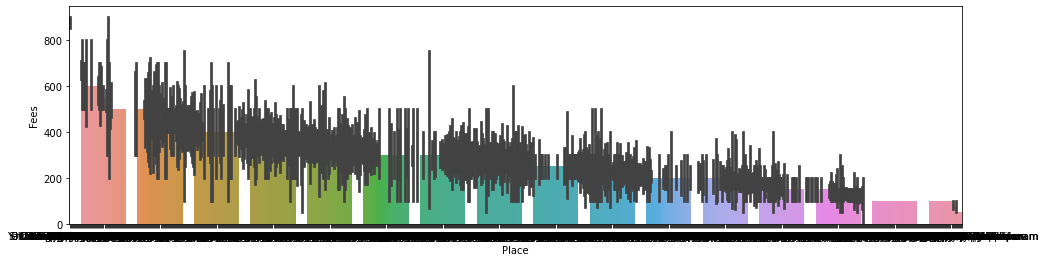

In [53]:
#Years of Experience vs Rating
fig_this_size(16,4)
sns.barplot(df1.Place,df1.Fees,order=df1.groupby('Place')['Fees'].mean().sort_values(ascending=False).index)

Bangalore has the highest average Doctor's Consulatancy Fees.

In [54]:
df1.drop('Place',1,inplace=True)
df1.head()

,Qualification,Years_Of_Experience,Rating,Profile,Fees
0,BHMS,24,100.0,Homeopath,100
1,BAMS,12,98.0,Ayurveda,350
2,MBBS,9,NaN,ENT Specialist,300
3,Other,12,NaN,Ayurveda,250
4,BAMS,20,100.0,Ayurveda,250


In [55]:
#Encode the data
cols=['Qualification', 'Profile']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    df1[i]=le.fit_transform(df1[i])

# Filling missing values

In [58]:
df1.isna().sum()

Qualification             0
Years_Of_Experience       0
Rating                 3302
Profile                   0
Fees                      0
dtype: int64

Rating has high Missing Values in Dataset

So we need to replace these Rating Values with mean values

In [59]:
df1['Rating'].fillna(df1['Rating'].mean(),inplace=True)

In [60]:
df1.isna().sum()

Qualification          0
Years_Of_Experience    0
Rating                 0
Profile                0
Fees                   0
dtype: int64

# Splitting the train and test set

In [62]:
df1.head()

,Qualification,Years_Of_Experience,Rating,Profile,Fees
0,2,24,100.000000,5,100
1,0,12,98.000000,0,350
2,3,9,94.643475,3,300
3,5,12,94.643475,0,250
4,0,20,100.000000,0,250


In [63]:
df1.corr()

,Qualification,Years_Of_Experience,Rating,Profile,Fees
Qualification,1.000000,0.116693,-0.124046,0.468264,0.218216
Years_Of_Experience,0.116693,1.000000,-0.177438,0.202073,0.002117
Rating,-0.124046,-0.177438,1.000000,-0.111018,-0.090106
Profile,0.468264,0.202073,-0.111018,1.000000,0.145226
Fees,0.218216,0.002117,-0.090106,0.145226,1.000000


<AxesSubplot:>

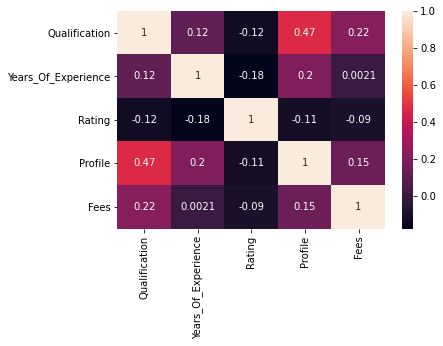

In [64]:
sns.heatmap(df1.corr(),annot=True)

In [65]:
x =df1.drop('Fees',axis=1)
y =df1['Fees']

In [66]:
# check shape
x.shape,y.shape

((5961, 4), (5961,))

# Finding Best Random State

In [68]:
max_r2=0
maxRs=0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.0772472407383632 on Random_State 79


So we will use Random State Value of 74

# Performing Train-Test Split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=79)

In [70]:
df1.describe()

,Qualification,Years_Of_Experience,Rating,Profile,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,2.414696,17.303976,94.643475,2.441872,307.944640
std,1.500384,11.142798,5.244204,1.658014,190.920373
min,0.000000,0.000000,7.000000,0.000000,5.000000
25%,1.000000,9.000000,94.643475,1.000000,150.000000
50%,3.000000,14.000000,94.643475,2.000000,300.000000
75%,3.000000,23.000000,96.000000,4.000000,500.000000
max,5.000000,66.000000,100.000000,5.000000,950.000000


# Training Our Model

In [72]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
ri=Ridge()
la=Lasso()
dtc=DecisionTreeRegressor()
svr=SVR()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [73]:
model=[lr,ri,la,dtc,svr,rf,gbr,abr]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mscore=m.score(x_train,y_train)
    print('Score;', mscore)
    print('Mean Absolute error: of',m)
    mae=mean_absolute_error(y_test,pred)
    print(mae)
    print('Mean Squared error: of',m)
    mse=mean_squared_error(y_test,pred)
    print(mse)
    print('Root Mean Squared error: of',m)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print(rmse)
    print('r2 score: of',m)
    r2score=r2_score(y_test,pred)
    print(r2score)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2score-crossval))
    print("\n")

Score; 0.05029710637851981
Mean Absolute error: of LinearRegression()
145.9872285339828
Mean Squared error: of LinearRegression()
31459.17391756416
Root Mean Squared error: of LinearRegression()
177.36734174465195
r2 score: of LinearRegression()
0.0772472407383632
Cross Validation Score: 0.053243209460388095
Difference Between r2_score and CrossValidation Score: 0.024004031277975103


Score; 0.05029710607552107
Mean Absolute error: of Ridge()
145.98752903691505
Mean Squared error: of Ridge()
31459.216909797797
Root Mean Squared error: of Ridge()
177.36746294007196
r2 score: of Ridge()
0.0772459797007301
Cross Validation Score: 0.05324335968630571
Difference Between r2_score and CrossValidation Score: 0.024002620014424395


Score; 0.05028045019772798
Mean Absolute error: of Lasso()
146.05922640339114
Mean Squared error: of Lasso()
31474.309180257973
Root Mean Squared error: of Lasso()
177.41000304452388
r2 score: of Lasso()
0.07680329693203614
Cross Validation Score: 0.05324181031016606

### We can see that  Random Forest Regressor is our best model.